In [1]:
# Data Processing
import numpy as np
from numpy import genfromtxt
import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

## Settings

In [2]:
classical_features_path = 'C:\\Users\\alext\\Desktop\\School\\2021 Spring\\CS 271\\Final Project\\Feature Extraction\\Classical\\Classical Features.csv'
jazz_features_path = 'C:\\Users\\alext\\Desktop\\School\\2021 Spring\\CS 271\\Final Project\\Feature Extraction\\Jazz\\Jazz Features.csv'

# The softness of the margin
C_list = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
# The exponent of the polynomial kernel
degree_list = [1,2,3,4,5]
# The kernel coefficient
sigma_list = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
# A minor parameter that scales the samples in the polynomial kernal
coef_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]

# Set the plot font
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

matplotlib.rc('font', **font)

## Load the Feature Data

In [3]:
def load_samples(group1_path, group2_path, num_train, num_clasif):
    num_to_load = num_train + num_clasif
    
    # Load enough features for training and classification
    group1_features = genfromtxt(group1_path, delimiter=',', max_rows=num_to_load)
    group2_features = genfromtxt(group2_path, delimiter=',', max_rows=num_to_load)
    
    # Get the training features from both groups
    training_X = group1_features[0:num_train, :]
    training_Y = group2_features[0:num_train, :]
    training_samples = np.concatenate((training_X, training_Y), axis=0)
    
    # Get the testing features from both groups
    testing_X = group1_features[num_train:num_to_load, :]
    testing_Y = group2_features[num_train:num_to_load, :]
    testing_samples = np.concatenate((testing_X, testing_Y), axis=0)
    
    # Get the classifications for the training and testing feature sets
    training_classifs = ([0] * num_train) + ([1] * num_train)
    testing_classifs = ([0] * num_clasif) + ([1] * num_clasif)
    
    return (training_samples, training_classifs, testing_samples, testing_classifs)

## Normalize Feature Sets

In [4]:
def normalize_features(training_samples, testing_samples):
    # Compute the mean and varience of each feature in the training set
    scaler = StandardScaler().fit(training_samples)

    # Normalize both the training and testing feature sets
    training_samples = scaler.transform(training_samples)
    testing_samples = scaler.transform(testing_samples)
    
    return (training_samples, testing_samples)

## Plot Accuracies

In [5]:
def plot_accuracies(variables, accuracies, variable_name, title_name):
    # Set the plot size
    figure(figsize=(8, 6), dpi=80)
    
    # Plot the data
    plot.plot(variables, accuracies, marker='.', markersize=15)
    
    # Set the titles
    plot.title(title_name)
    plot.xlabel(variable_name)
    plot.ylabel('Accuracy')
    
    # Force the x-axis to display integer ticks
    ax = plot.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plot.show()

## Train Model

In [6]:
def train_model(training_samples, kernel, C=1, degree=1, sigma='auto', coef=1.0):
    
    if sigma == 'auto':
        gamma = 'auto'
    else:
        gamma = 1 / (2 * sigma ** 2)
    
    # Train the model using our training data
    model = svm.SVC(kernel=kernel, C=C, degree=degree, gamma=gamma, coef0=coef)
    model.fit(training_samples, training_classifs)
    
    return model

## Load a Small Feature Set

In [7]:
# Load the feature data
sample_data = load_samples(classical_features_path, jazz_features_path, 1000, 1000)
training_samples  = sample_data[0]
training_classifs = sample_data[1]
testing_samples   = sample_data[2]
testing_classifs  = sample_data[3]

# Normalize the feature sets
(training_samples, testing_samples) = normalize_features(training_samples, testing_samples)

## Linear Kernel Margin Softness Testing

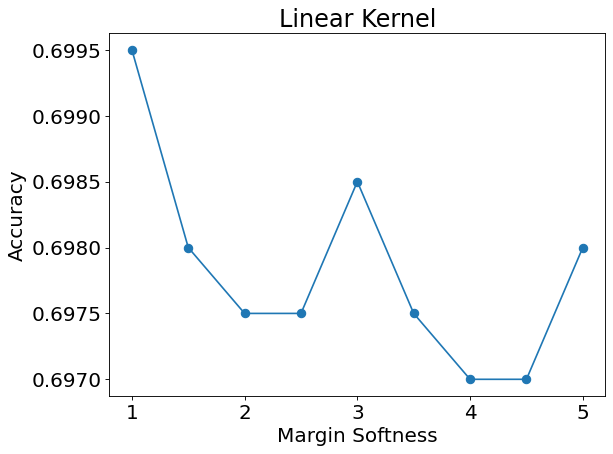

Best Accuracy: 69.95


In [8]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for C in C_list:
    # Train the model
    model = train_model(training_samples, kernel='linear', C=C)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(C_list, accuracy_list, 'Margin Softness', 'Linear Kernel')

best_linear = max(accuracy_list) * 100
print('Best Accuracy: {}'.format(best_linear))

# Polynomial Kernel Degree Testing

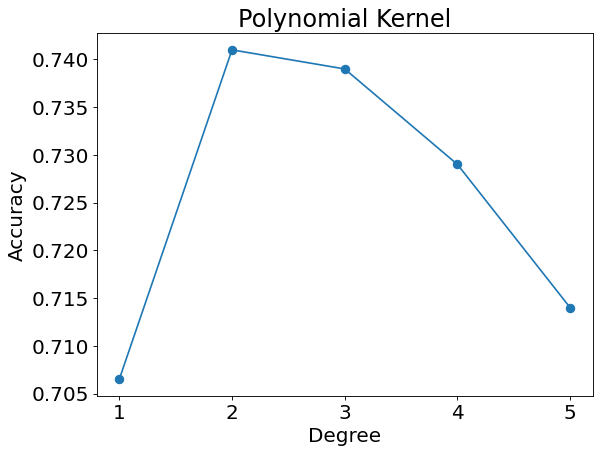

Best Accuracy: 74.1


In [9]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for degree in degree_list:
    # Train the model
    model = train_model(training_samples, kernel='poly', C=1, degree=degree, sigma='auto')
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(degree_list, accuracy_list, 'Degree', 'Polynomial Kernel')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))

# Polynomial Kernel Sigma Testing

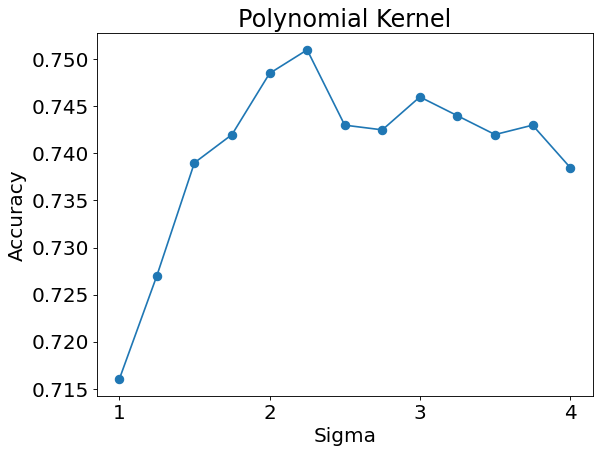

Best Accuracy: 75.1


In [10]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for sigma in sigma_list:
    # Train the model
    model = train_model(training_samples, kernel='poly', C=1, degree=2, sigma=sigma)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(sigma_list, accuracy_list, 'Sigma', 'Polynomial Kernel')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))

# Polynomial Kernel Coefficient Testing

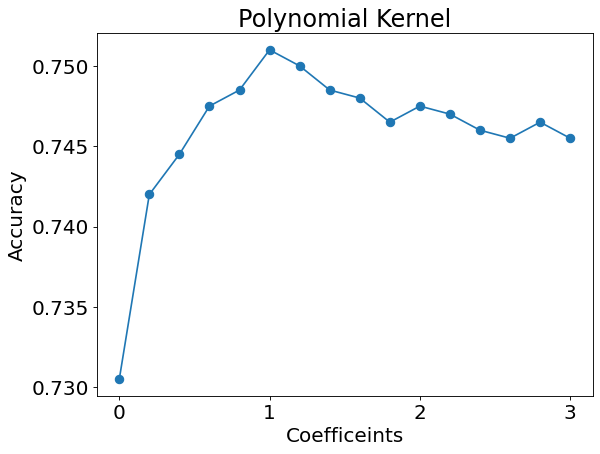

Best Accuracy: 75.1


In [11]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for coef in coef_list:
    # Train the model
    model = train_model(training_samples, kernel='poly', C=1, degree=2, sigma=2.25, coef=coef)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(coef_list, accuracy_list, 'Coefficeints', 'Polynomial Kernel')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))

# Polynomial Kernel Margin Softness Testing

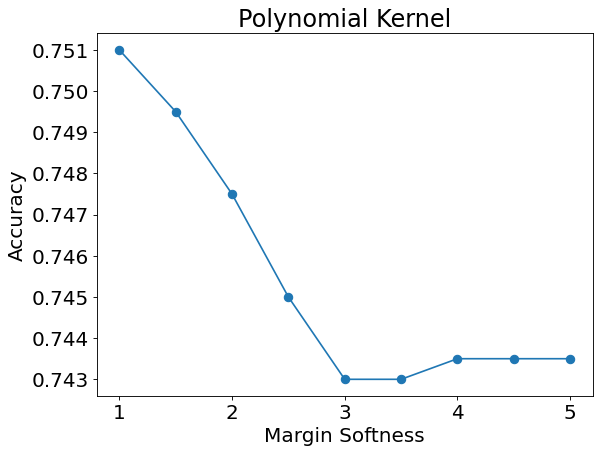

Best Accuracy: 75.1


In [12]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for C in C_list:
    # Train the model
    model = train_model(training_samples, kernel='poly', C=C, degree=2, sigma=2.25, coef=1.0)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(C_list, accuracy_list, 'Margin Softness', 'Polynomial Kernel')

best_poly = max(accuracy_list) * 100
print('Best Accuracy: {}'.format(best_poly))

# RBF Kernel Sigma Testing

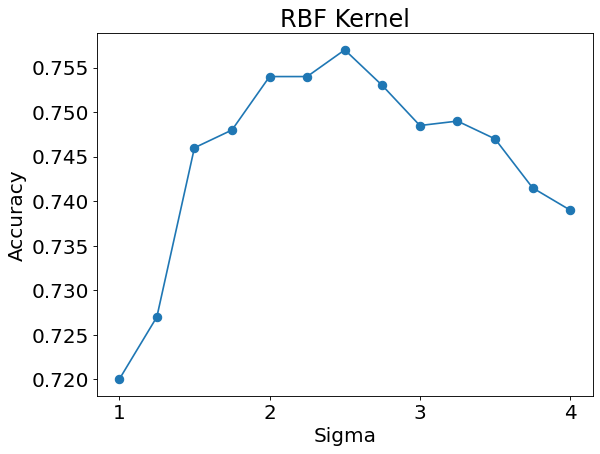

Best Accuracy: 75.7


In [13]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for sigma in sigma_list:
    # Train the model
    model = train_model(training_samples, kernel='rbf', sigma=sigma)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(sigma_list, accuracy_list, 'Sigma', 'RBF Kernel')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))

# RBF Kernel Margin Softness Testing

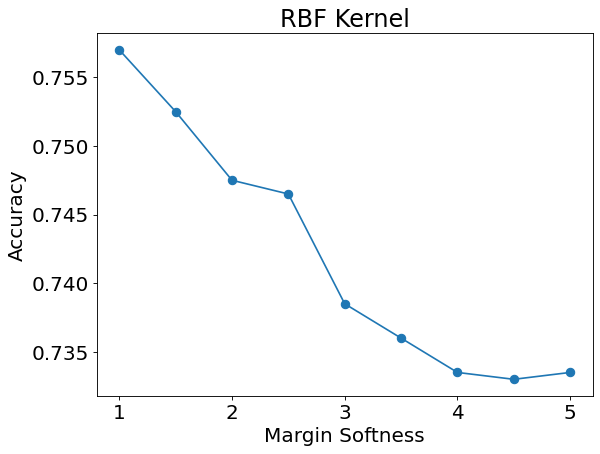

Best Accuracy: 75.7


In [14]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for C in C_list:
    # Train the model
    model = train_model(training_samples, kernel='rbf', C=C, sigma=2.5)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(C_list, accuracy_list, 'Margin Softness', 'RBF Kernel')

best_rbf = max(accuracy_list) * 100
print('Best Accuracy: {}'.format(best_rbf))

## Plot the Best Accuracies of Each Kernel

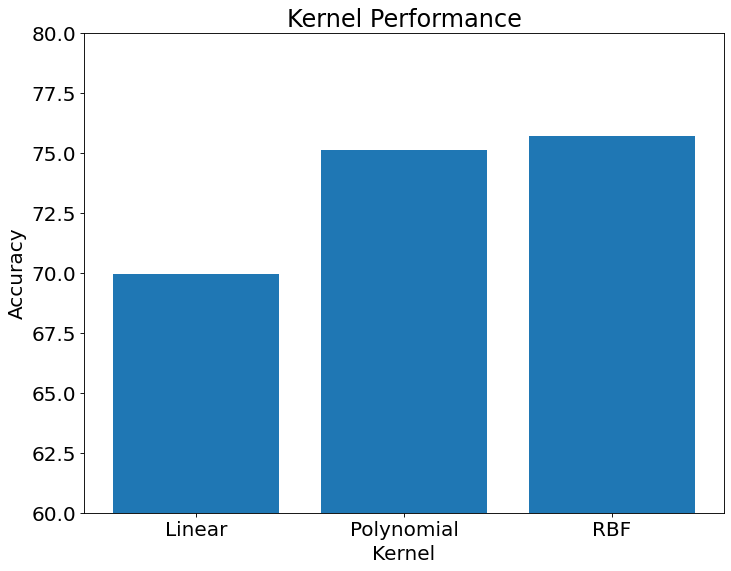

In [15]:
# Set the plot size
fig = figure(figsize=(8, 6), dpi=80)

ax = fig.add_axes([0,0,1,1])

# Set the titles
ax.set_title('Kernel Performance')
ax.set_xlabel('Kernel')
ax.set_ylabel('Accuracy')

# Set the data
kernels = ['Linear', 'Polynomial', 'RBF']
accuracies = [best_linear, best_poly, best_rbf]
ax.bar(kernels, accuracies)

# Set the y axis limits
plot.ylim([60, 80])

plot.show()